In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#L1_rcus=range(16,96,8)
L1_rcus1=range(0,48)
L1_rcus2=range(48,96)
#L1_rcus=[0,1,2,8]
L1start=datetime.fromisoformat("2023-02-02 16:01:52")
L1sst_sec=1 #time for each sample
tstep_min=10;

L1_files1='../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152'
L1_files2='../menno/cs032/20230202160121_SST_HBA_ONE/20230202_160156'


In [3]:
navg=tstep_min*60//L1sst_sec #10 minutes
if True:
 from sst_bst import LoadL1sst
 D=[]
 for rcu in L1_rcus1:
    D1=LoadL1sst(L1_files1,rcu)
    n1,n2=D1.shape
    n0=n1//navg
    D1=np.percentile(D1[:n0*navg].reshape([n0,navg,n2]),50,axis=1)
    #D1=np.mean(D1[:n0*navg].reshape([n0,navg,n2]),axis=1)
    D.append(D1)
 for rcu in L1_rcus2:
    D1=LoadL1sst(L1_files2,rcu)
    n1,n2=D1.shape
    n0=n1//navg
    D1=np.percentile(D1[:n0*navg].reshape([n0,navg,n2]),50,axis=1)
    #D1=np.mean(D1[:n0*navg].reshape([n0,navg,n2]),axis=1)
    D.append(D1)
 D=np.array(D)
 D=np.swapaxes(D,0,1)
 print(D.shape)
 np.save("L1_HBA",D)
else:
 D=np.load("L1_HBA.npy")
print('hours=',D.shape[0]*tstep_min/60)
L1_hour=np.arange(D.shape[0])*tstep_min/60+(16+1/60+52/60/60-24)

../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu000.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu001.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu002.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu003.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu004.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu005.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu006.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu007.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu008.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu009.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu010.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu011.dat
../menno/cs032/20230202160121_SST_HBA_ZERO/20230202_160152_sst_rcu012.dat
../menno/cs032/20230202160121_SST_HBA_

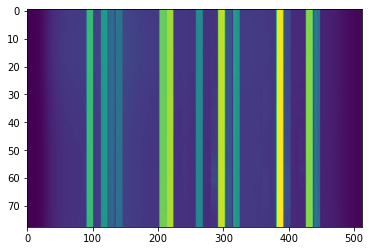

In [4]:
def P2dB(P): return 10*np.log10(P)
plt.imshow(P2dB(D[:,0,:]),aspect='auto')

In [5]:
sis=range(8*3,8*3+12); #signal inputs
START_TIME="2023-02-02 06:00:00" 
END_TIME=  "2023-02-02 23:00:00"
#START_TIME="2022-12-07 13:35:00" 
#END_TIME=  "2022-12-08 07:35:00"
tstep_min=10;
filename="HBA_%s_%imin.npy"%(START_TIME,tstep_min)
D2=np.load(filename)
print(D2.shape)
L2_hour=np.arange(D2.shape[0])/60*tstep_min+(6-24)
L2_hour=L2_hour/80*100+9
D2=D2[26:-12]
L2_hour=L2_hour[26:-12]

(143, 12, 512)


In [6]:
freqs=160+np.arange(512)/512*80
freqL1=freqs #np.roll(freqs[::-1],0)
def Pnorm(P1):
    Pwr=10*np.log10(P1)
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    return Pwr


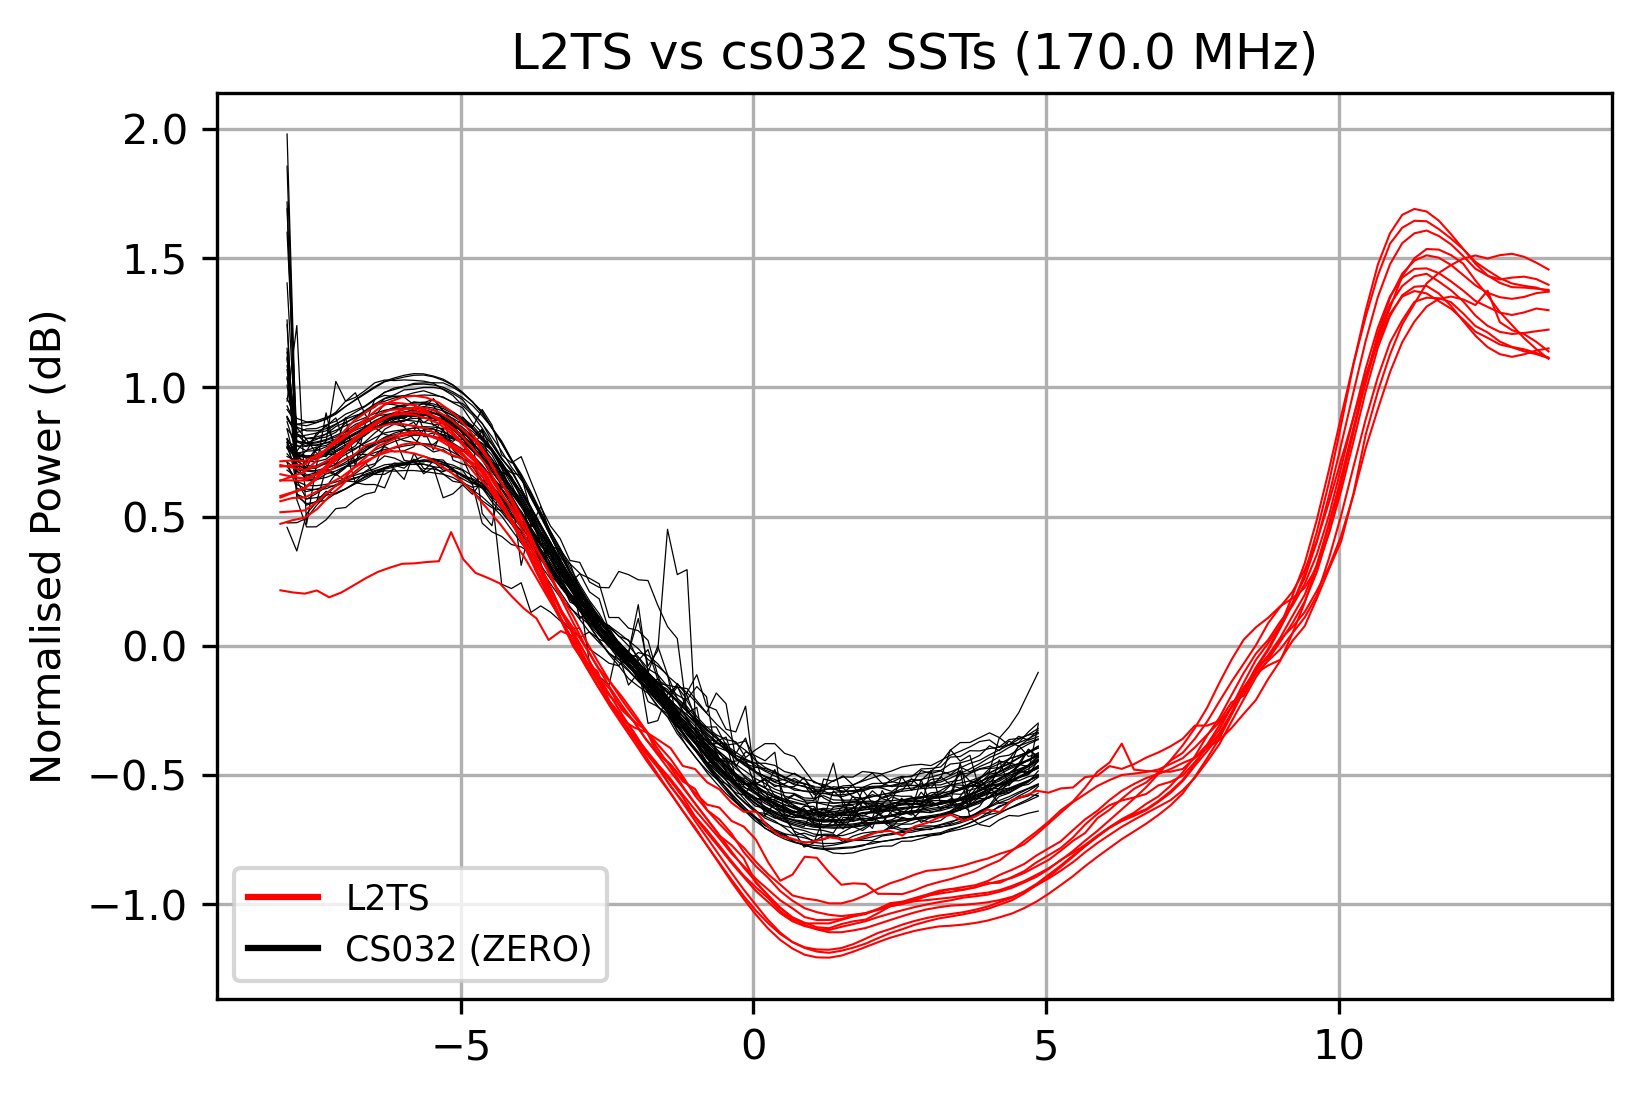

In [7]:
freq1=170;
A1cut=0.15
A2cut=0.15

i2=np.argmin(np.abs(freqs-freq1))
i1=np.argmin(np.abs(freqL1-freq1))

plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
if True:
#for i in [i1]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Dn=Pnorm(D[:,:,i1])
    A1=np.std(Dn-np.percentile(Dn,50,axis=1)[:,np.newaxis],axis=0)
    #print(A1)
    for rcu in range(Dn.shape[1]):
        if A1[rcu]>A1cut: continue
        plt.plot(L1_hour,Dn[:,rcu],'k-',linewidth=0.3,markersize=1)


    D2n=Pnorm(D2[:,:,i2])
    A2=np.std(D2n-np.percentile(D2n,50,axis=1)[:,np.newaxis],axis=0)
#    print(A2)
    for l in range(12):
#        if A2[l]>A2cut: continue
        plt.plot(L2_hour,D2n[:,l],'r-',linewidth=0.5);

plt.plot([],[],'r-',label='L2TS')
plt.plot([],[],'k-',label='CS032 (ZERO)')
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small')
#plt.xlabel('Hours since 2022-11-25 00:00:00')
plt.title("L2TS vs cs032 SSTs (%.1f MHz)"%freqs[i2])
plt.grid()
#plt.ylim(-0.5,0.5)

#plt.xlim(0,48)

Text(0.5, 0, 'Hours since 2023-02-03 0h')

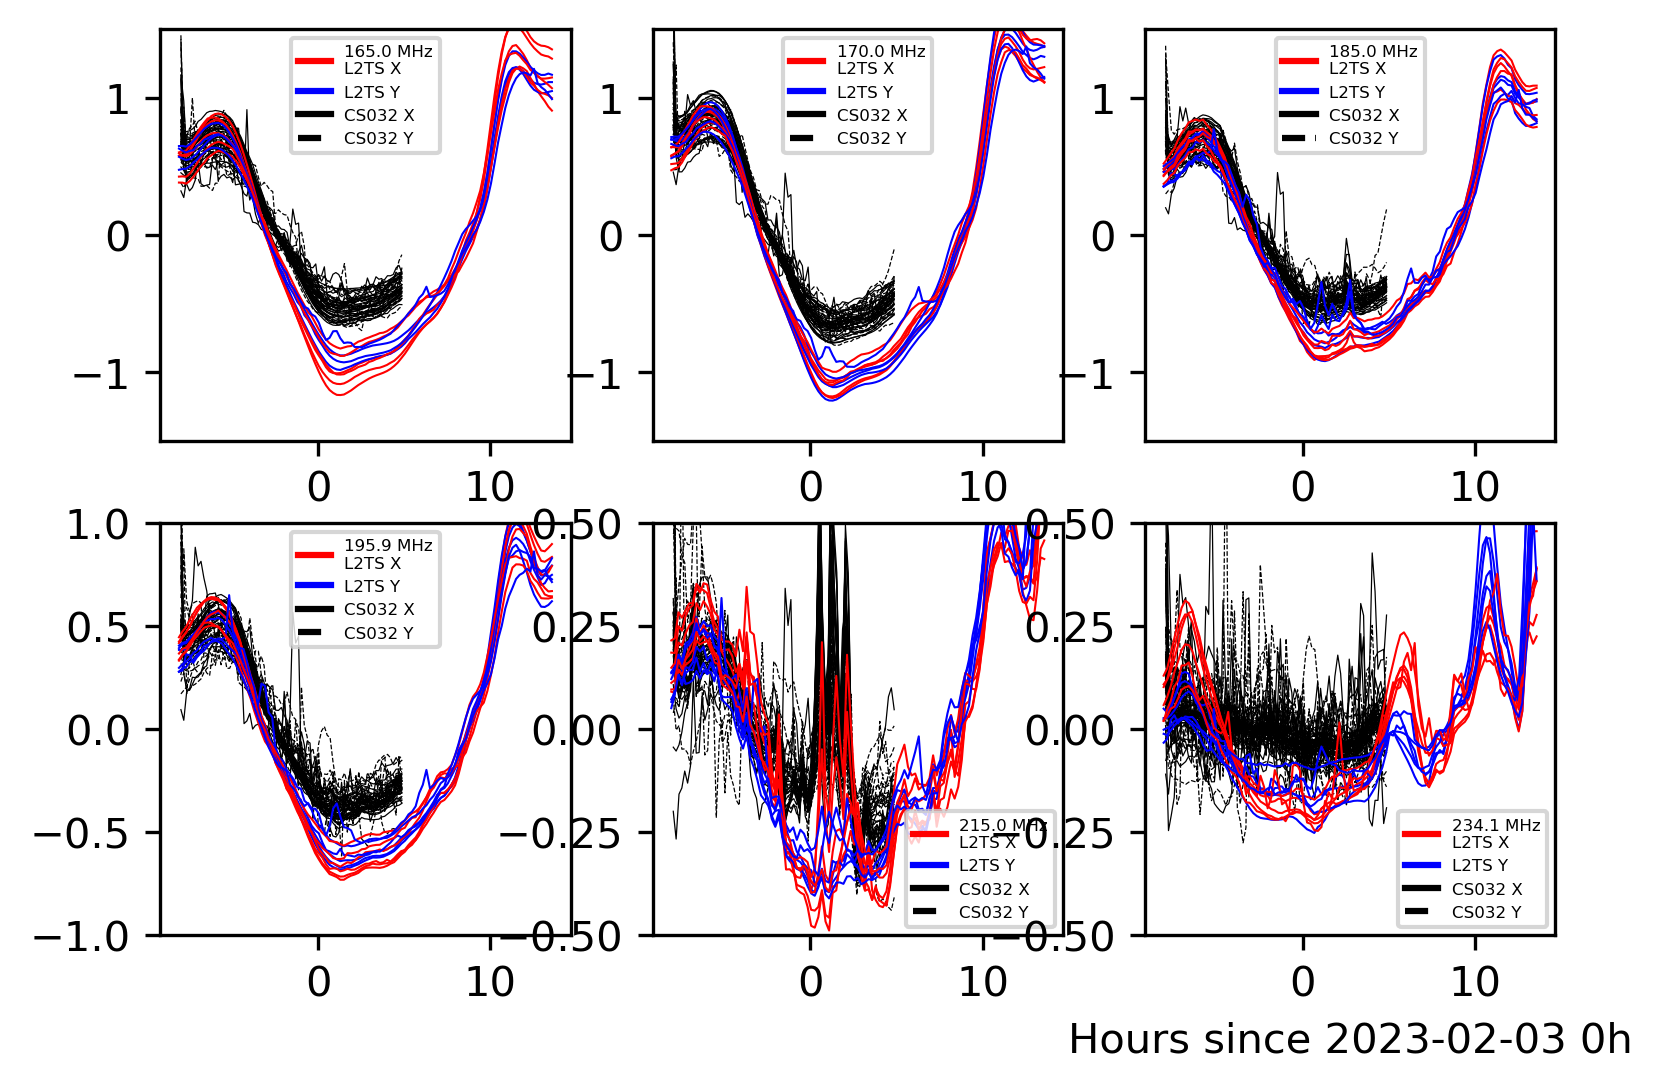

In [8]:
freqlist=[165,170,185,196,215,234]
plt.figure(dpi=300)
for x,freq1 in enumerate(freqlist):
    plt.subplot(2,3,x+1)
    i2=np.argmin(np.abs(freqs-freq1))
    i1=np.argmin(np.abs(freqL1-freq1))
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Dn=Pnorm(D[:,:,i1])
    A1=np.std(Dn-np.percentile(Dn,50,axis=1)[:,np.newaxis],axis=0)

    for rcu in range(Dn.shape[1]):
        if A1[rcu]>A1cut: continue
        clr='k' if rcu%2==0 else 'k--'
        plt.plot(L1_hour,Dn[:,rcu],clr,linewidth=0.3)

    D2n=Pnorm(D2[:,:,i2])
    A2=np.std(D2n-np.percentile(D2n,50,axis=1)[:,np.newaxis],axis=0)
    for l in range(12):
        if A2[l]>A2cut: continue
        clr='r' if l%2==0 else 'b'
        plt.plot(L2_hour,D2n[:,l],clr,linewidth=0.5);

#    plt.xlim(-9,4)
    plt.ylim(-1.5,1.5)
#    plt.title("%.1f MHz"%freqs[i])
    #plt.grid()
    plt.plot([],[],'r-',label='%.1f MHz\nL2TS X'%freqs[i2])
    plt.plot([],[],'b-',label='L2TS Y'%freqs[i2])
    plt.plot([],[],'k-',label='CS032 X'%freqL1[i1])
    plt.plot([],[],'k--',label='CS032 Y'%freqL1[i1])
    plt.legend(fontsize=4)
plt.subplot(2,3,4)
plt.ylim(-1,1)
plt.subplot(2,3,5)
plt.ylim(-0.5,0.5)
plt.subplot(2,3,6)
plt.ylim(-0.5,0.5)
#plt.ylabel('Normalised Power (dB)')
#plt.legend(fontsize='small')
plt.xlabel('Hours since 2023-02-03 0h')
#plt.title("L2TS vs cs032 SSTs (%.1f MHz)"%freqs[i])


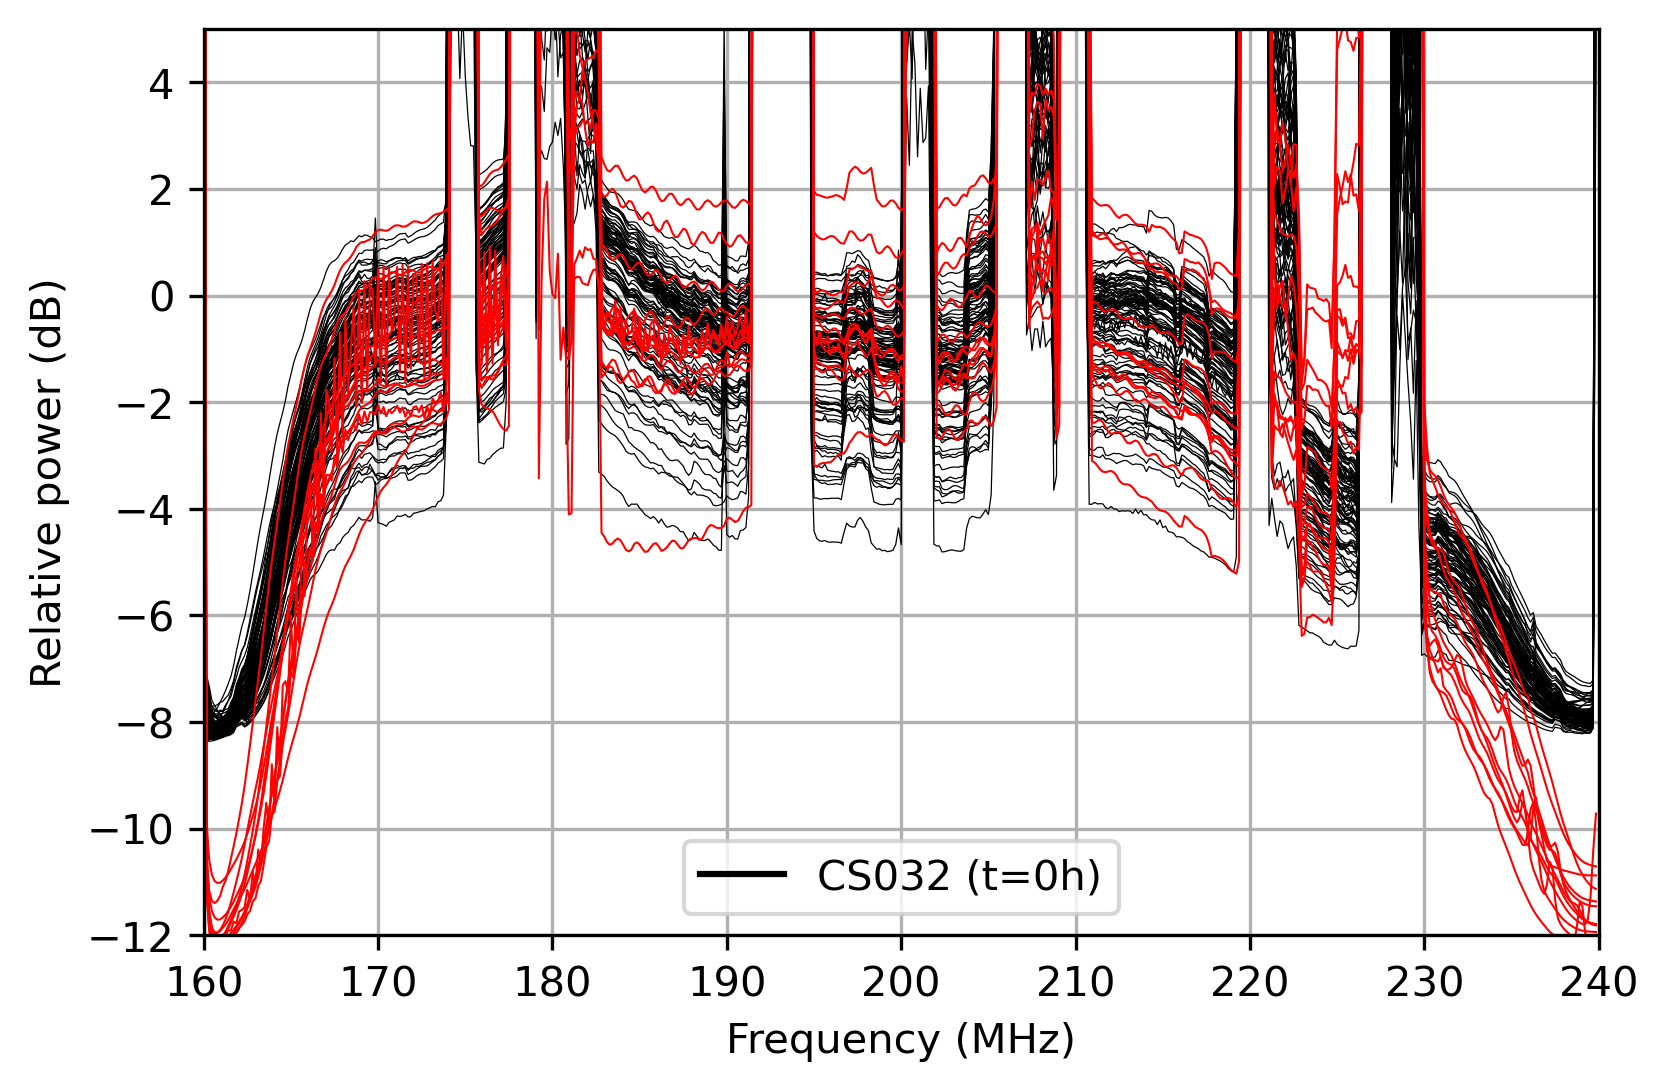

In [9]:
plt.figure(dpi=300)

#hselect=-7;
#plt.subplot(2,1,1)
#plt.xlim(100,200)
#plt.ylim(0,50)
#plt.grid()

#ihr=np.argmin(np.abs(L1_hour-hselect))
#plt.plot(freqL1,np.roll(P2dB(D[ihr,::2,:]).T,-1,axis=0)-53,'k-',linewidth=0.3);

#ihr=np.argmin(np.abs(L2_hour-hselect))
#plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);
#itest=np.argmin(np.abs(freqL1-240))
hselect=0;
#plt.subplot(2,1,2)
plt.xlim(160,240)
plt.ylim(-12,5)
plt.grid()
ihr=np.argmin(np.abs(L1_hour-hselect))
for x in range(D.shape[1]):
#    if P2dB(D[ihr,x,itest])-53-12.5-4<10: continue;
    plt.plot(freqL1,np.roll(P2dB(D[ihr,x,:]).T,-1,axis=0)-67,'k-',linewidth=0.3,markersize=0.3);

ihr=np.argmin(np.abs(L2_hour-hselect))
scale=[2,3,3,0,2,0,1,1,0,0.5,0,0]
for x in range(12):
#    scale=0# if x<3 else 2
    plt.plot(freqs,P2dB(D2[ihr,x,:]).T-67-scale[x]*0,'r-',linewidth=0.5,markersize=0.3);
#    plt.plot(freqs,P2dB(D2[ihr,x,:]).T-53-12.5-scale[x]*0,'r-',linewidth=0.3,markersize=0.5);
#for x in range(6,12):
#    plt.plot(freqs,P2dB(D2[ihr,x,:]).T-53-12.5,'b.',linewidth=0.3);
plt.ylabel("Relative power (dB)")
plt.xlabel("Frequency (MHz)")
plt.plot([],[],'k-',label='CS032 (t=%ih)'%hselect)
#plt.plot([],[],'r-',label='L2TS (Dither off)')
#plt.plot([],[],'b-',label='L2TS (Dither on)')
plt.legend()

Text(0.5, 0, 'Frequency (MHz)')

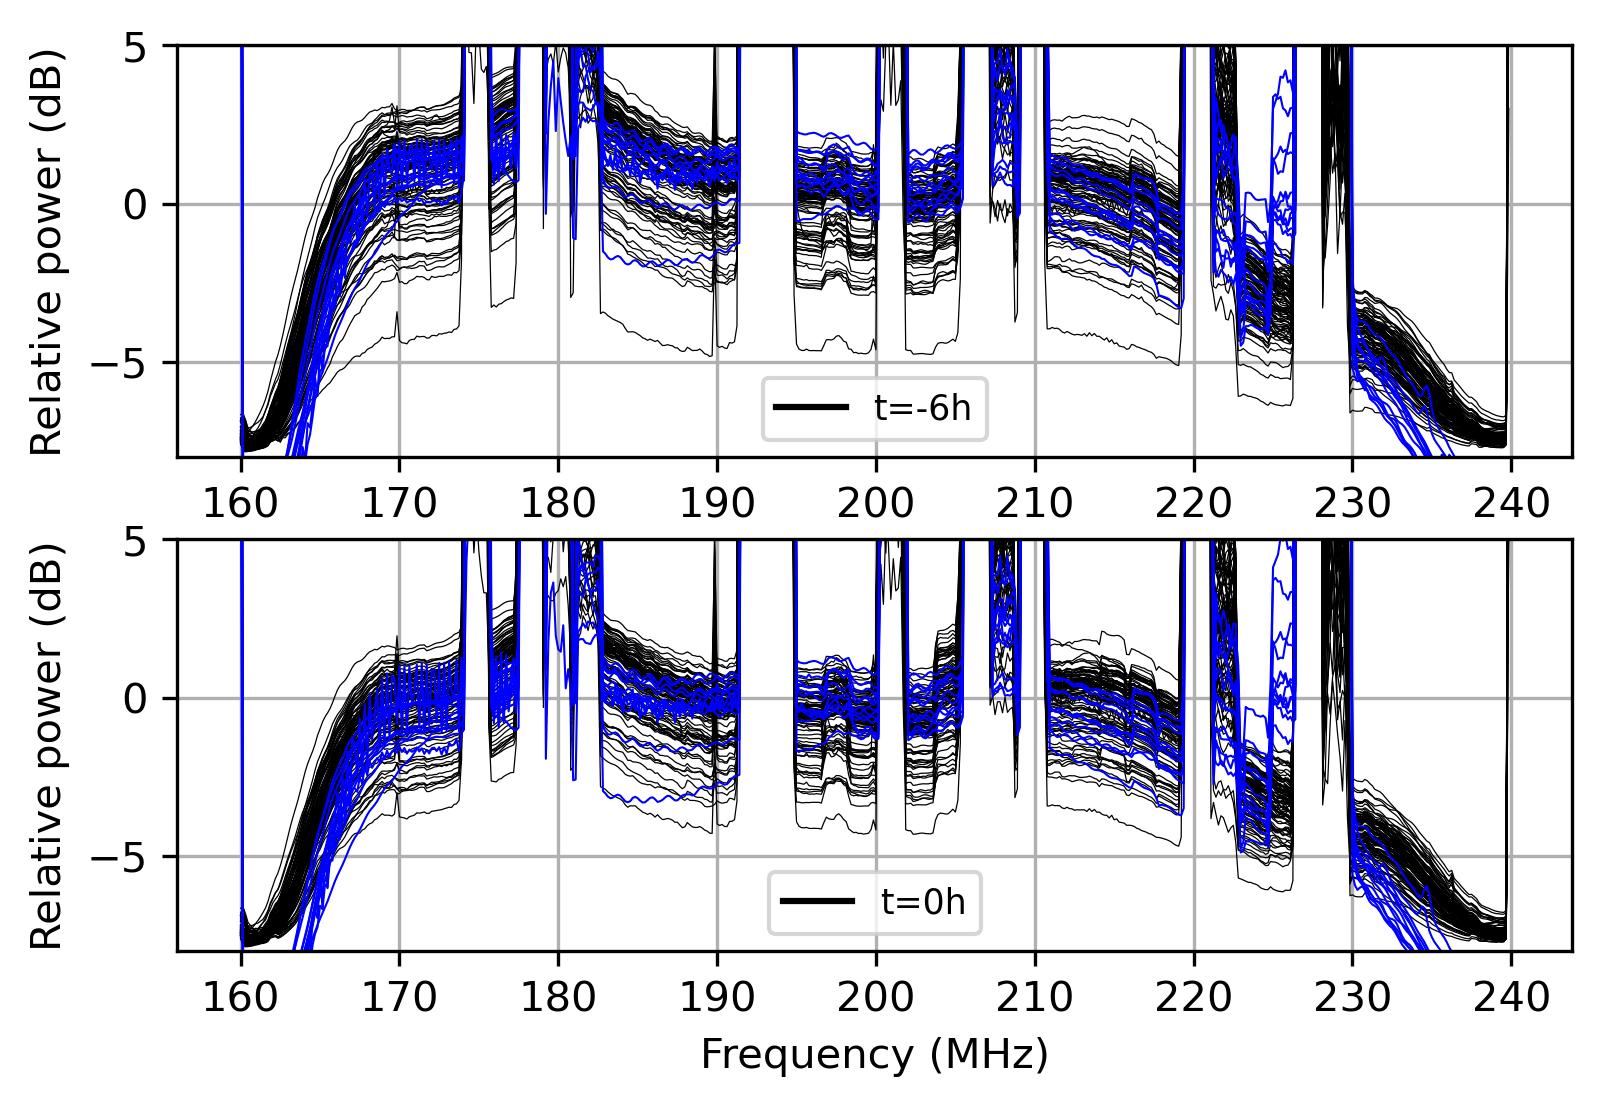

In [10]:
plt.figure(dpi=300)

hselect=[-6,0];
for x,h1 in enumerate(hselect):
    plt.subplot(2,1,x+1)
#    plt.xlim(210,270)
#    plt.xlim(160,165)
    #plt.ylim(-5,75)
    plt.ylim(-8,5)
    plt.grid()

    ihr=np.argmin(np.abs(L1_hour-h1))
    plt.plot(freqL1,np.roll(P2dB(D[ihr,::1,:]).T,-1,axis=0)-53-12.5-1,'k-',linewidth=0.3,markersize=0.3);

    ihr=np.argmin(np.abs(L2_hour-h1))
#          0 1 2 3 4 5 6 7 8 9   0 1
    scale=[2,3,3,0,2,0,1,1,0,0.5,0,0]
    for x in range(12):
#        scale=0
#        scale+=-0.5 if x in [9] else 0
#        scale+=-1 if x in [6,7] else 0
#        scale+=-2 if x in [0,4] else 0
#        scale+=-3 if x in [1,2] else 0
        
        plt.plot(freqs,P2dB(D2[ihr,x,:])-53-12.5-scale[x],'b-',linewidth=0.5,markersize=0.3);
    plt.plot([],[],'k-',label='t=%ih'%h1)
    plt.legend(fontsize='small')
    plt.ylabel("Relative power (dB)")
plt.xlabel("Frequency (MHz)")

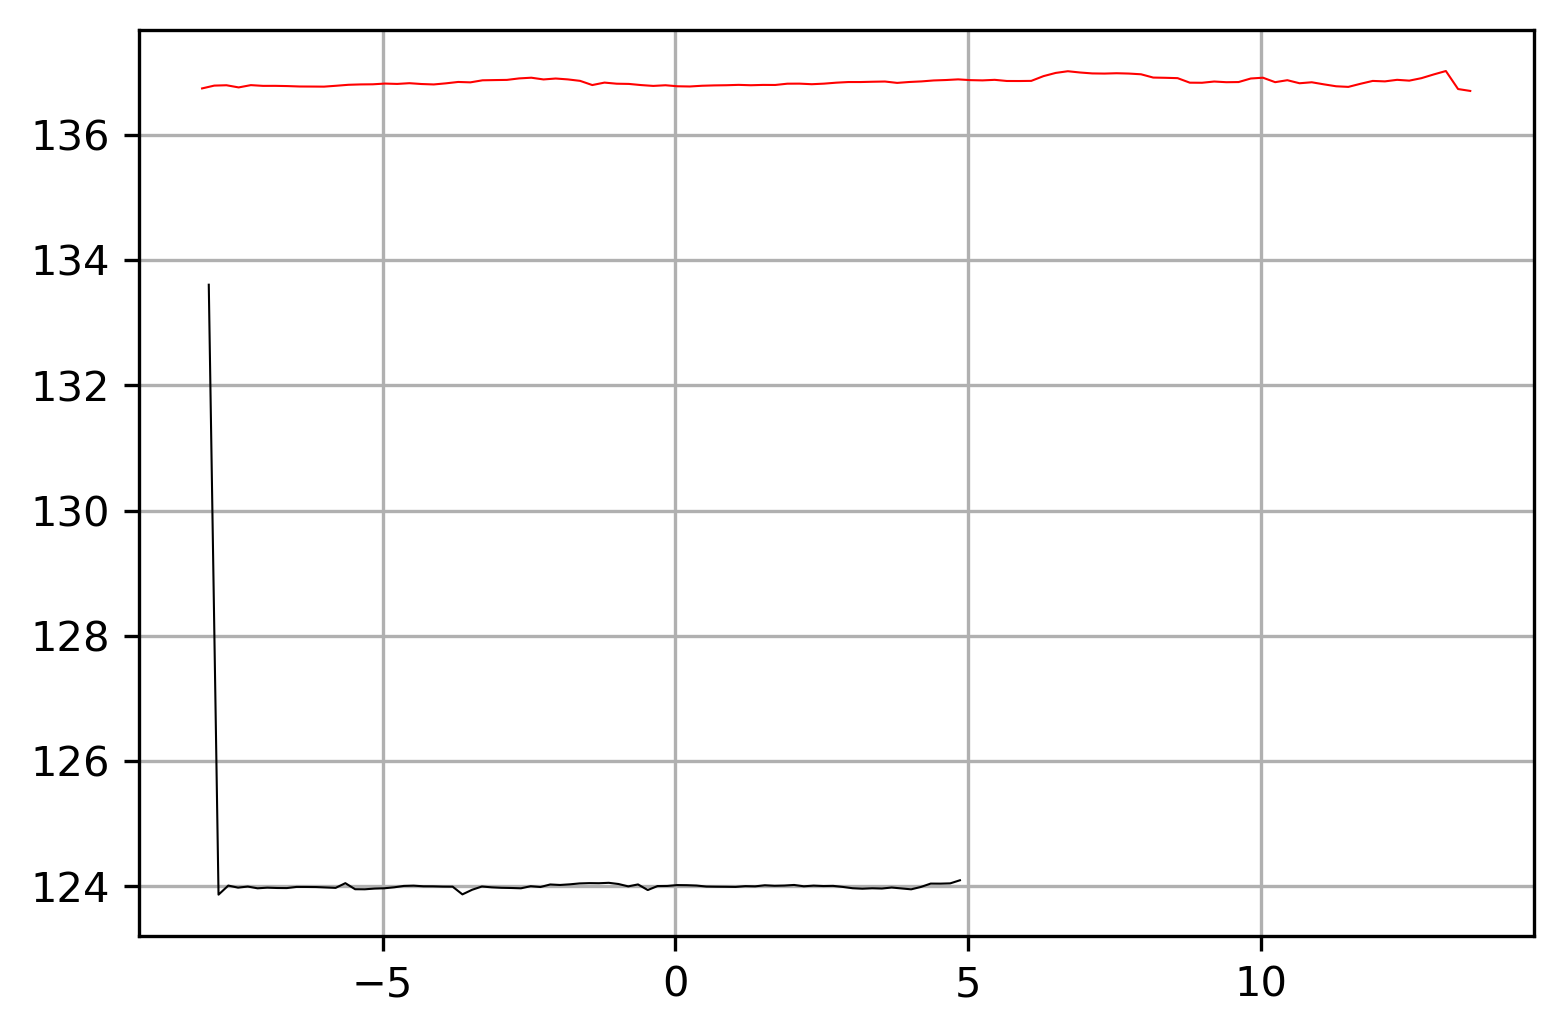

In [11]:
plt.figure(dpi=300)

P1=np.max( np.sum(D,axis=2) ,axis=1)
plt.plot(L1_hour,P2dB(P1),'k-',linewidth=0.5);

P2=np.max( np.sum(D2[:,:,:450],axis=2) ,axis=1)
#P2=np.sum(D2,axis=2)
plt.plot(L2_hour,P2dB(P2)+7,'r-',linewidth=0.5);

#plt.ylim(125,135)
#plt.xlim(38,40)
#plt.xlim(50,52)
plt.grid()

Text(0.5, 0, 'Frequency (MHz)')

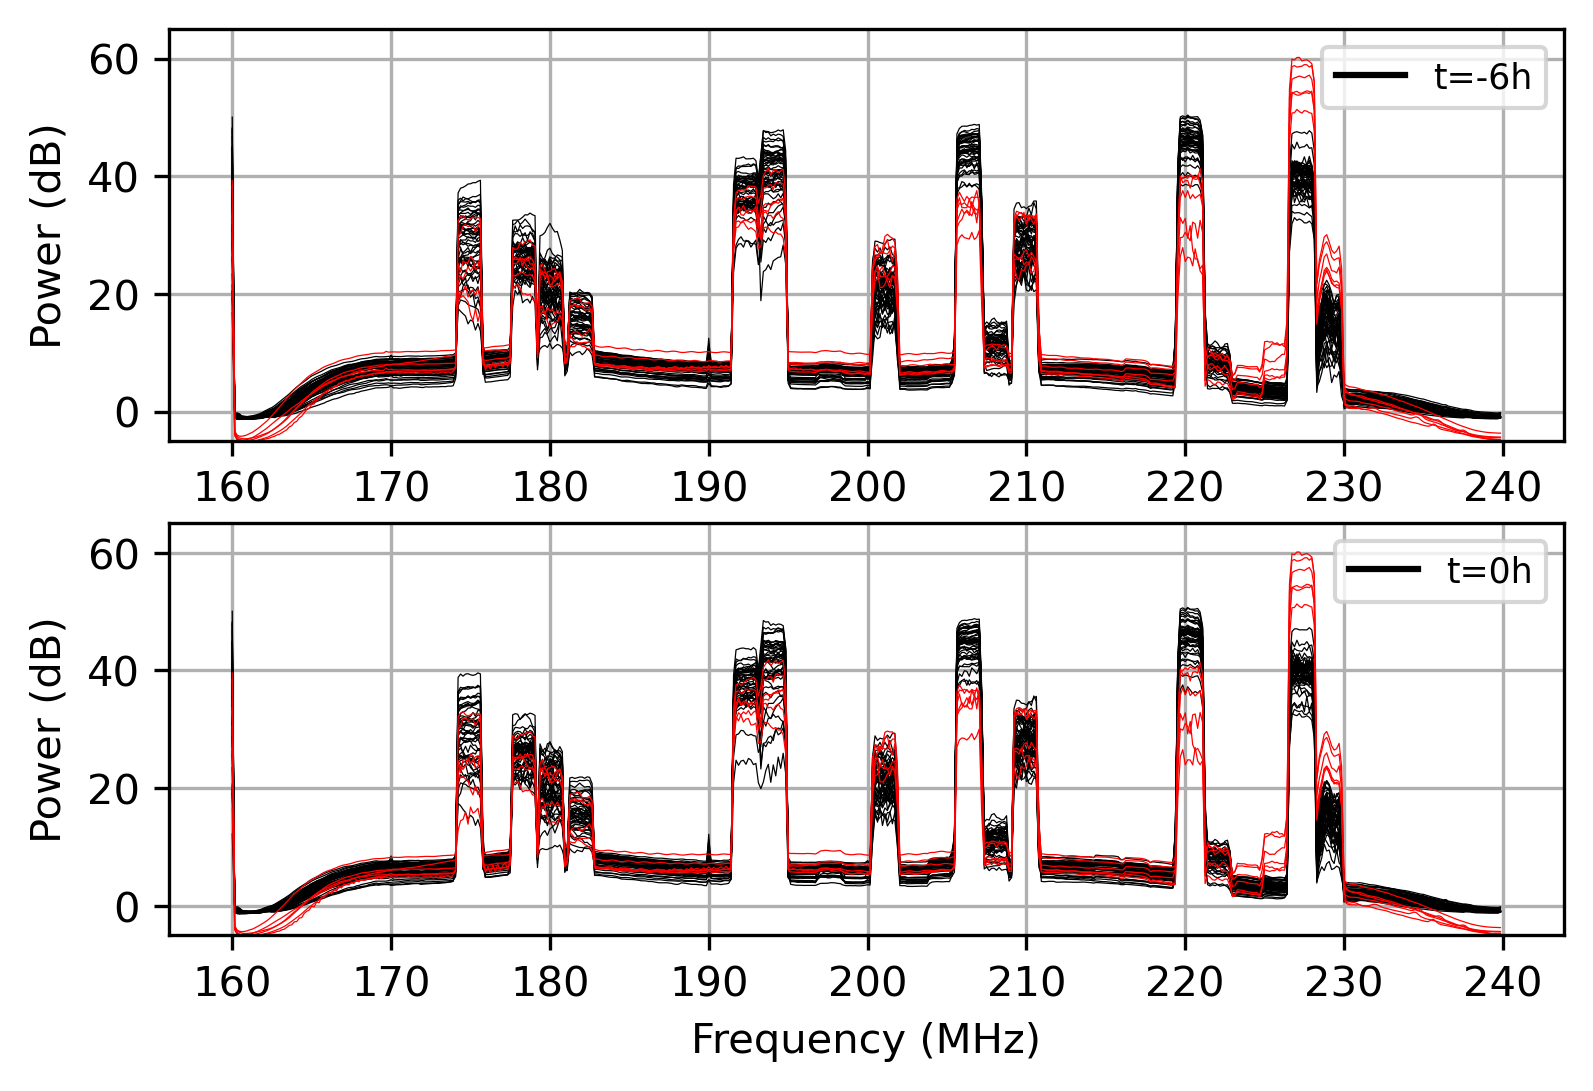

In [12]:
plt.figure(dpi=300)

hselect=[-6,0];
for x,h1 in enumerate(hselect):
    plt.subplot(2,1,x+1)
#    plt.xlim(0,100)
    plt.ylim(-5,65)
    #plt.ylim(-2,25)
    plt.grid()

    ihr=np.argmin(np.abs(L1_hour-h1))
    plt.plot(freqs,P2dB(D[ihr,::2,:]).T-60,'k-',linewidth=0.3);

    ihr=np.argmin(np.abs(L2_hour-h1))
    plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-60,'r-',linewidth=0.3);
    plt.plot([],[],'k-',label='t=%ih'%h1)
    plt.legend(fontsize='small')
    plt.ylabel("Power (dB)")
plt.xlabel("Frequency (MHz)")


[1.9324508  1.93511332 1.47665265 2.19060395 2.1670608  1.44403718]


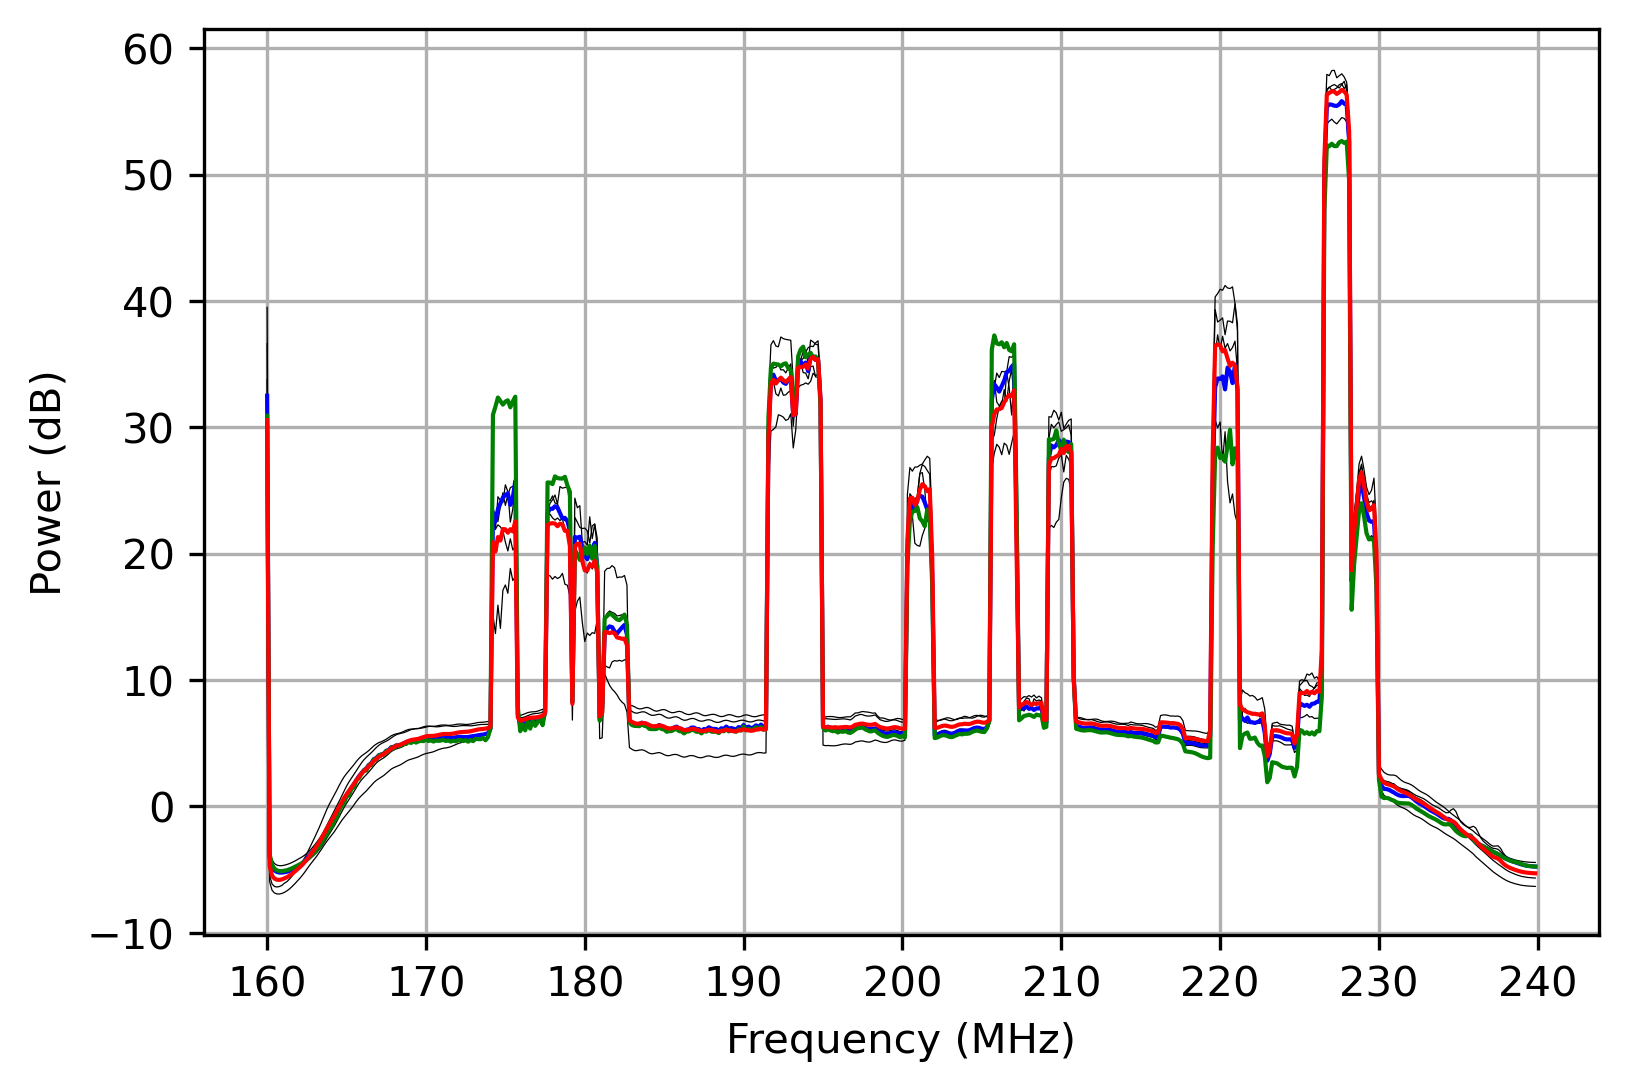

In [16]:
plt.figure(dpi=300)
def plotdatamean(data,cutoff,offset=-60,plotdata=True):
    dmean=np.percentile(data,50,axis=0)
    diff=np.std(data-dmean,axis=1)
    print(diff)
    data2=np.ma.array(data.T,mask=[diff<cutoff]*len(freqs)).T
    dmean2=np.mean(data2,axis=0)
    sum1=np.zeros_like(data[0])
    cnt1=0
    for d in data:
        diff=np.std(d-dmean)
#        print(diff)
        if diff<cutoff:
         sum1+=d
         cnt1+=1
         if plotdata:  plt.plot(freqs,d+offset,'k-',linewidth=0.3);
    sum1/=cnt1;
    plt.plot(freqs,dmean+offset,'b-',linewidth=1);
    plt.plot(freqs,dmean2+offset,'g-',linewidth=1);
    plt.plot(freqs,sum1+offset,'r-',linewidth=1);
    return sum1+offset
    
hselect=[5];
for x,h1 in enumerate(hselect):
#    plt.subplot(2,1,x+1)
    #plt.xlim(0,100)
    #plt.ylim(-5,40)
    #plt.ylim(-2,25)
    plt.grid()

    ihr=np.argmin(np.abs(L1_hour-h1))
#    L1mean=plotdatamean(P2dB(D[ihr,::2,:]),2.0,offset=-60)

    ihr=np.argmin(np.abs(L2_hour-h1))
    data=P2dB(D2[ihr,::2,:])
    data[0]-=2
    data[1]-=2
    L2mean=plotdatamean(data,2.0,offset=-60)
#    plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);
#    plt.plot([],[],'k-',label='t=%ih'%h1)
#    plt.legend(fontsize='small')
    plt.ylabel("Power (dB)")
plt.xlabel("Frequency (MHz)")
np.savez("L1L2_180MHz",L1=L1mean,L2=L2mean,freq=freqs)